Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.5202 - val_loss: 0.3629
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3521 - val_loss: 0.3390
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3340 - val_loss: 0.3319
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3277 - val_loss: 0.3269
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3229 - val_loss: 0.3230
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3197 - val_loss: 0.3202
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3163 - val_loss: 0.3179
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.3152 - val_loss: 0.3160
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3135 - val_loss: 0.3145
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3117 - val_loss: 0.3132
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3109 - val_loss: 0.3125
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

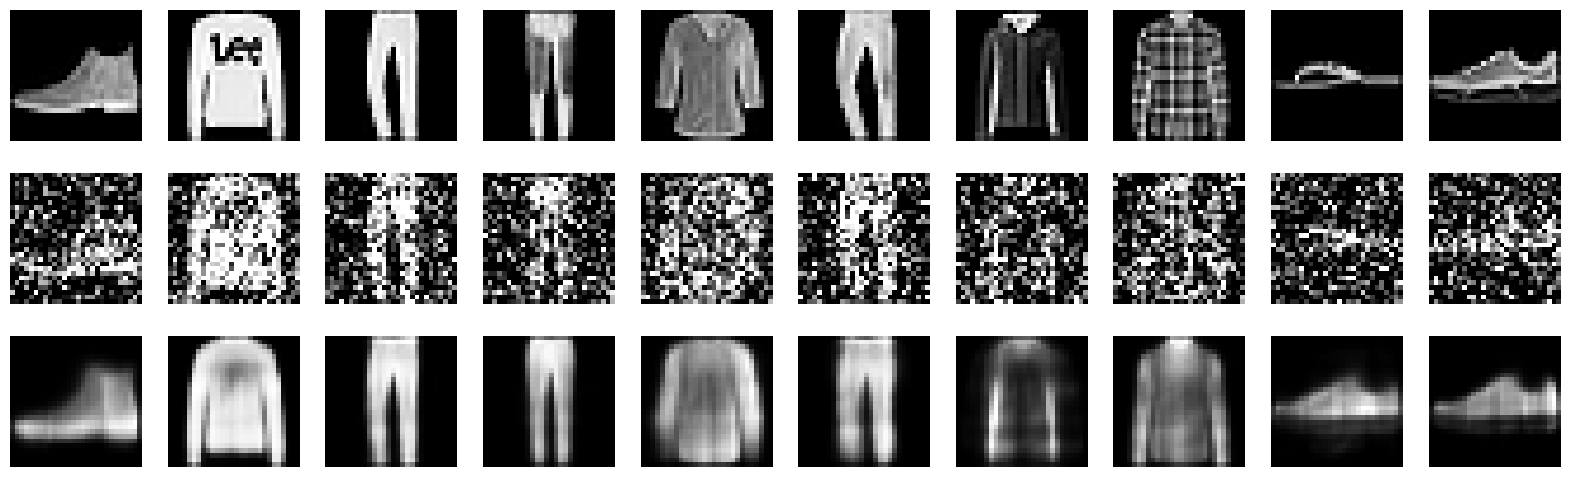

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#flattening
#28×28 = 784 pixels → converted into a 1D vector
x_train_flat = x_train.reshape(len(x_train), 784)
x_test_flat = x_test.reshape(len(x_test), 784)

#n = 10
encoding_dim = 32 # encoding_dim = 32 → compressed representation will be 32 numbers
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)  # Expands 32 → back to 784

denoising_autoencoder = tf.keras.Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# This creates noisy images by adding random Gaussian noise.
# Example:
# original pixel = 0.6
# noise = +0.2
# noisy pixel = 0.8

noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
x_test_noisy = x_test_flat + noise_factor * \
    np.random.normal(loc=0.0, scale=1.0, size=x_test_flat.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

denoising_autoencoder.fit(x_train_noisy, x_train_flat,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_flat))

decoded_imgs = denoising_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

In [ ]:
loc=0.0 → noise values are centered around 0
scale=0.1 → tiny noise

scale=2.0 → very strong noise